<a href="https://colab.research.google.com/github/seojeong-oh/mom-dad-lab/blob/main/fashion_MNIST_tensorflow_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **필요한 모듈 불러오기**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST 데이터셋 불러오기

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

fashion_mnist 모듈은 데이터셋을 반환하는 load_data() 함수를 포함하는데, load_data() 함수를 호출하면 NumPy 어레이의 튜플을 반환함

train_images와 train_labels는 Neural Network 모델의 훈련 (training)에 사용되고,

test_images와 test_labels는 테스트 (test)에 사용

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(train_labels[:8])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[9 0 0 3 0 2 7 2]


**images**

*   train_images와 test_images는 각각 (28x28)의 형태를 갖는 60000개, 10000개 이미지의 어레이,


**labels**


*   0에서 9까지의 정수 값은 이미지(옷)의 클래스를 나타내는 레이블

각각의 레이블과 클래스는 아래와 같다.

0 : T-shirt/top

1 : Trouser

2 : Pullover

3 : Dress

4 : Coat

5 : Sandal

6 : Shirt

7 : Sneaker

8 : Bag

9 : Ankel boot


# **데이터 전처리**

In [ ]:
#0에서 255 사이의 값을 갖는 훈련/테스트 데이터들을 0.0~1.0 사이의 값을 갖도록 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

# **모델 구성(layer 3개)**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


relu함수를 은닉층(hidden layer)에서 많이 사용하는 이유 
1. 기울기 소실 문제가 발생하지 않음
2. 기존 활성화 함수에 비해 속도가 매우 빠름

## **모델 컴파일하기**

**loss function**

Binary Crossentropy : 실제 레이블과 예측 레이블 간의 교차 엔트로피 손실을 계산한다. 레이블 클래스(0, 1로 가정)가 2개만 존재할 때 사용

Categorical Crossentropy : 다중 분류 손실함수로 출력값이 one-hot encoding 된 결과로 나오고 실측 결과와의 비교시에도 실측 결과는 one-hot encoding 형태로 구성

Sparse_Categorical_Crossentropy : 'categorical_entropy'처럼 다중 분류 손실함수이지만, 샘플 값은 정수형 자료
샘플 값을 입력하는 부분에서 별도 원핫 인코딩을 하지 않고 정수값 그대로 줄 수 있다. 이런 자료를 사용할 때, 컴파일 단계에서 손실 함수만  'sparse_categorical_crossentropy'로 바꿔주면 된다.

In [ ]:
model.compile(optimizer='adam', # 훈련 과정에서 모델의 오차를 측정하는데 사용
              loss='sparse_categorical_crossentropy', # 데이터와 손실함수를 바탕으로 모델을 업데이트하는 방식
              metrics=['accuracy']) #훈련과 테스트 단계를 평가하기 위해 사용

## **모델 훈련하기**

In [ ]:
history = model.fit(train_images, train_labels, epochs=5,validation_split=0.25)#batch_sizes default값 32

Epoch 1/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5201 - accuracy: 0.8166 - val_loss: 0.4182 - val_accuracy: 0.8490
Epoch 2/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3875 - accuracy: 0.8603 - val_loss: 0.3726 - val_accuracy: 0.8619
Epoch 3/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3464 - accuracy: 0.8738 - val_loss: 0.3582 - val_accuracy: 0.8689
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3210 - accuracy: 0.8813 - val_loss: 0.3447 - val_accuracy: 0.8761
Epoch 5/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3030 - accuracy: 0.8878 - val_loss: 0.3495 - val_accuracy: 0.8723


epochs : 60000개의 전체 이미지를 몇 번 학습할지 정하기

**시각화**

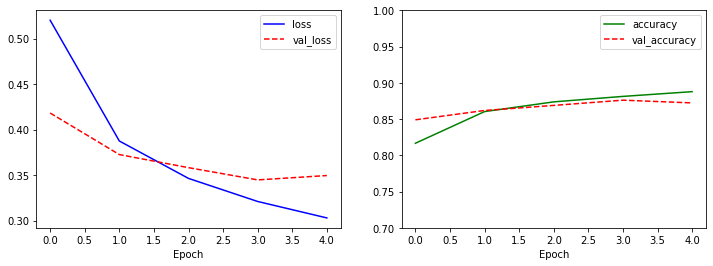

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

## **모델의 정확도 평가하기**

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('loss : ', loss)
print('accuracy : ', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8665
loss :  0.3741350471973419
accuracy :  0.8665000200271606


## **예측하기**

In [ ]:
predictions = model.predict(test_images) # predictions : test_images에 대한 출력값
print(predictions.shape)
print(np.argmax(predictions[0]))

(10000, 10)
9


# **모델 구성(Dense -> conv2d)**

In [ ]:
#기존 model을 유지하나 처음에 convolution layer가 추가되어있음 -> 시간은 더 오래걸리지만, 정확도는 더 높아짐
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.3),
  #Pooling 목적 : 과대적합을 피하기위해서
  #maxpooling : 해당 부분의 최대값만 뽑아냄
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'), #64->128로 늘리니 정확도 증가함
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)       

## 모델 컴파일하기

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## 모델 훈련하기

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.25) 
#batch_sizes default : 32

Epoch 1/5
1407/1407 [==============================] - 112s 79ms/step - loss: 0.6282 - accuracy: 0.7674 - val_loss: 0.4026 - val_accuracy: 0.8541
Epoch 2/5
1407/1407 [==============================] - 110s 78ms/step - loss: 0.4373 - accuracy: 0.8428 - val_loss: 0.3396 - val_accuracy: 0.8725
Epoch 3/5
1407/1407 [==============================] - 111s 79ms/step - loss: 0.3784 - accuracy: 0.8631 - val_loss: 0.3153 - val_accuracy: 0.8833
Epoch 4/5
1407/1407 [==============================] - 110s 78ms/step - loss: 0.3461 - accuracy: 0.8742 - val_loss: 0.2873 - val_accuracy: 0.8911
Epoch 5/5
1407/1407 [==============================] - 110s 78ms/step - loss: 0.3263 - accuracy: 0.8808 - val_loss: 0.2728 - val_accuracy: 0.8945


## 모델 정확도 평가

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('loss : ', loss)
print('accuracy : ', accuracy)

313/313 [==============================] - 6s 18ms/step - loss: 0.2894 - accuracy: 0.8900
loss :  0.2893989384174347
accuracy :  0.8899999856948853


***dense->conv2d***

정확도가 향상된 것을 확인할 수 있음


---

0.8960999846458435

pytorch 실습에서 정확도보다 높은 결과임



image.png

**시각화**

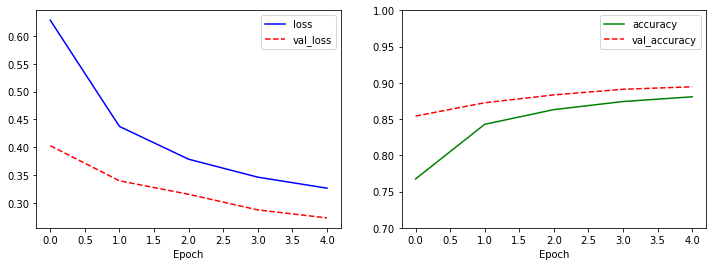

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

**예측하기(시각화)**

In [ ]:
predictions = model.predict(test_images) # predictions : test_images에 대한 출력값
print(predictions.shape)
print(np.argmax(predictions[0]))

(10000, 10)
9


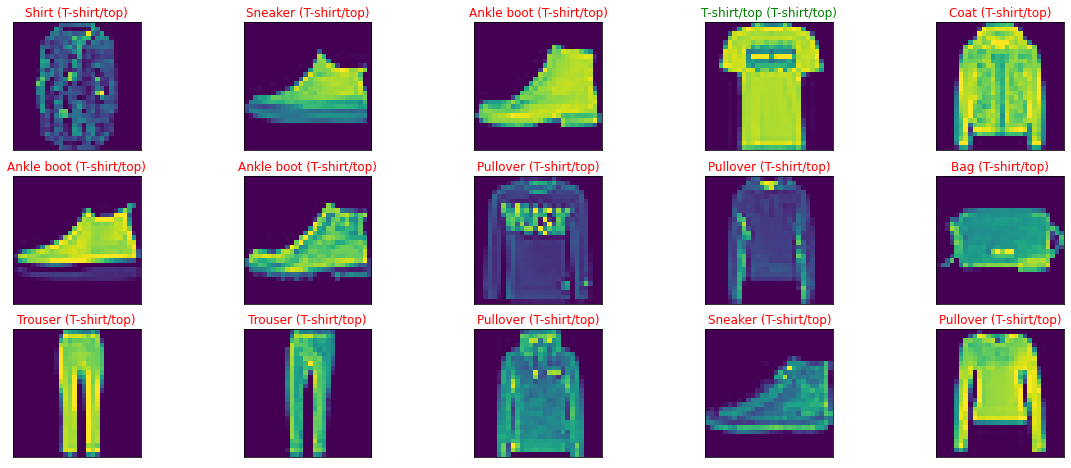

In [ ]:
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2
                        "Dress",        # 인덱스 3
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6
                        "Sneaker",      # 인덱스 7
                        "Bag",          # 인덱스 8
                        "Ankle boot"]   # 인덱스 9

# y_hat은 test 데이터셋 예측
predictions = model.predict(test_images)
# y_hat -> predictions
#x_test -> test_images
#y_test -> test_labels
# 무작위 샘플로 10 개의 테스트 이미지와 예측 레이블 및 실제 레이블을 그려줍니다.
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[index])) # 각각의 이미지를 보여줌
    predict_index = np.argmax(predictions[index])
    true_index = np.argmax(test_labels[index]) # 각각의 이미지에 예측레이블 (실제레이블) 표시
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# **Reference**
1. https://codetorial.net/tensorflow/fashion_mnist_classification.html
2. https://durian9s-coding-tree.tistory.com/2
3. https://gooopy.tistory.com/55
4. https://airsbigdata.tistory.com/219
5. https://airsbigdata.tistory.com/219
6. https://github.com/KerasKorea/KEKOxTutorial/blob/master/10_Fashion-MNIST%20with%20tf.Keras/10_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98%20Hello%20World%2C%20Fashion-MNIST.md